In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

## tidy data

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
cell_tidy_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'MajorRegion', 'SubRegion', 'CellClass', 'l1-umap_0', 'l1-umap_1',
       'l1-tsne_0', 'l1-tsne_1', 'MajorType', 'l2-umap_0', 'l2-umap_1',
       'l2-tsne_0', 'l2-tsne_1', 'SubType', 'l3-umap_0', 'l3-umap_1',
       'l3-tsne_0', 'l3-tsne_1', 'L1CellClass', 'class_tsne_0', 'class_tsne_1',
       'class_umap_0', 'class_umap_1'],
      dtype='object')

## Palettes

In [5]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

## Select

In [6]:
cell_class = 'Inh'
total_cell_tidy_data = cell_tidy_data.copy()
cell_tidy_data = cell_tidy_data[cell_tidy_data['CellClass'] == cell_class].copy()

In [7]:
cell_tidy_data['SubType'].unique().size

83

## Color by major type

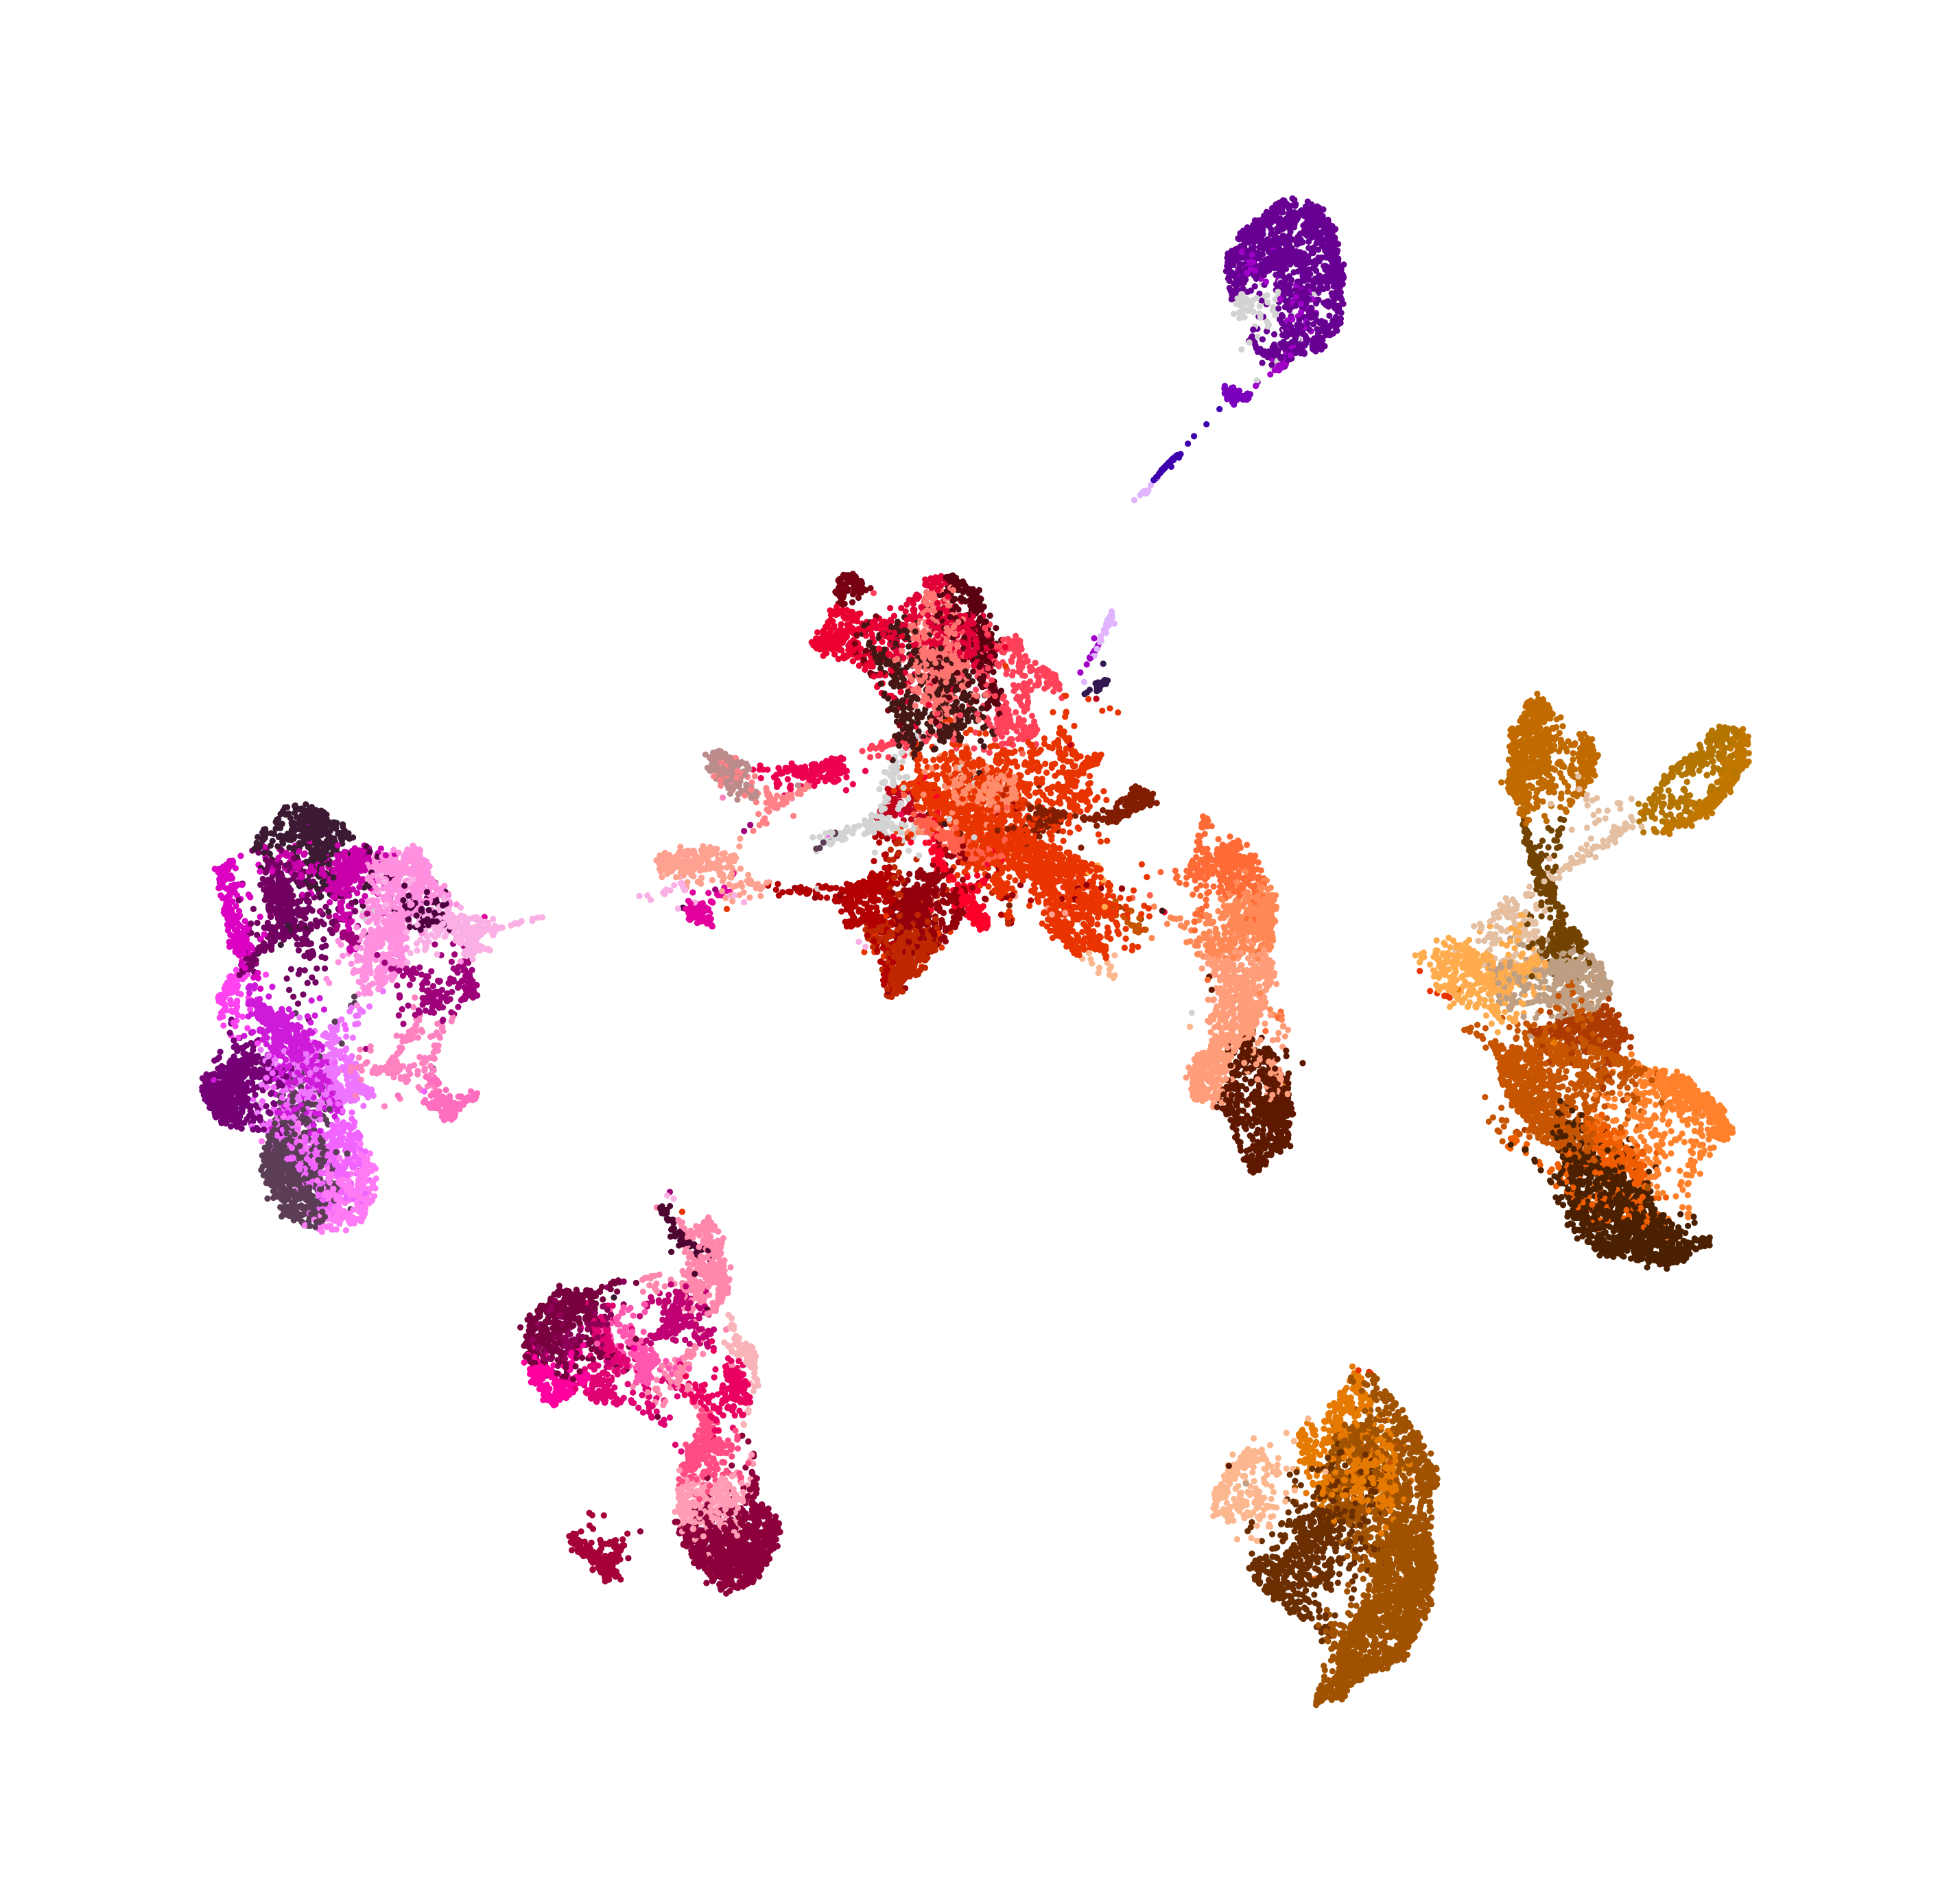

In [8]:
fig, ax = plt.subplots(figsize=(2.8, 2.8), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='class_umap',
                    hue='SubType',
                    palette=sub_type_palette,
                    s=0.3,
                    max_points=None,
                    axis_format=None,
                    #text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))


# add_ax_box(ax, linewidth=0.5)

fig.savefig(f'files/{cell_class}_CLASS-UMAP_color_by_sub_type.scatter_part.png')

pass

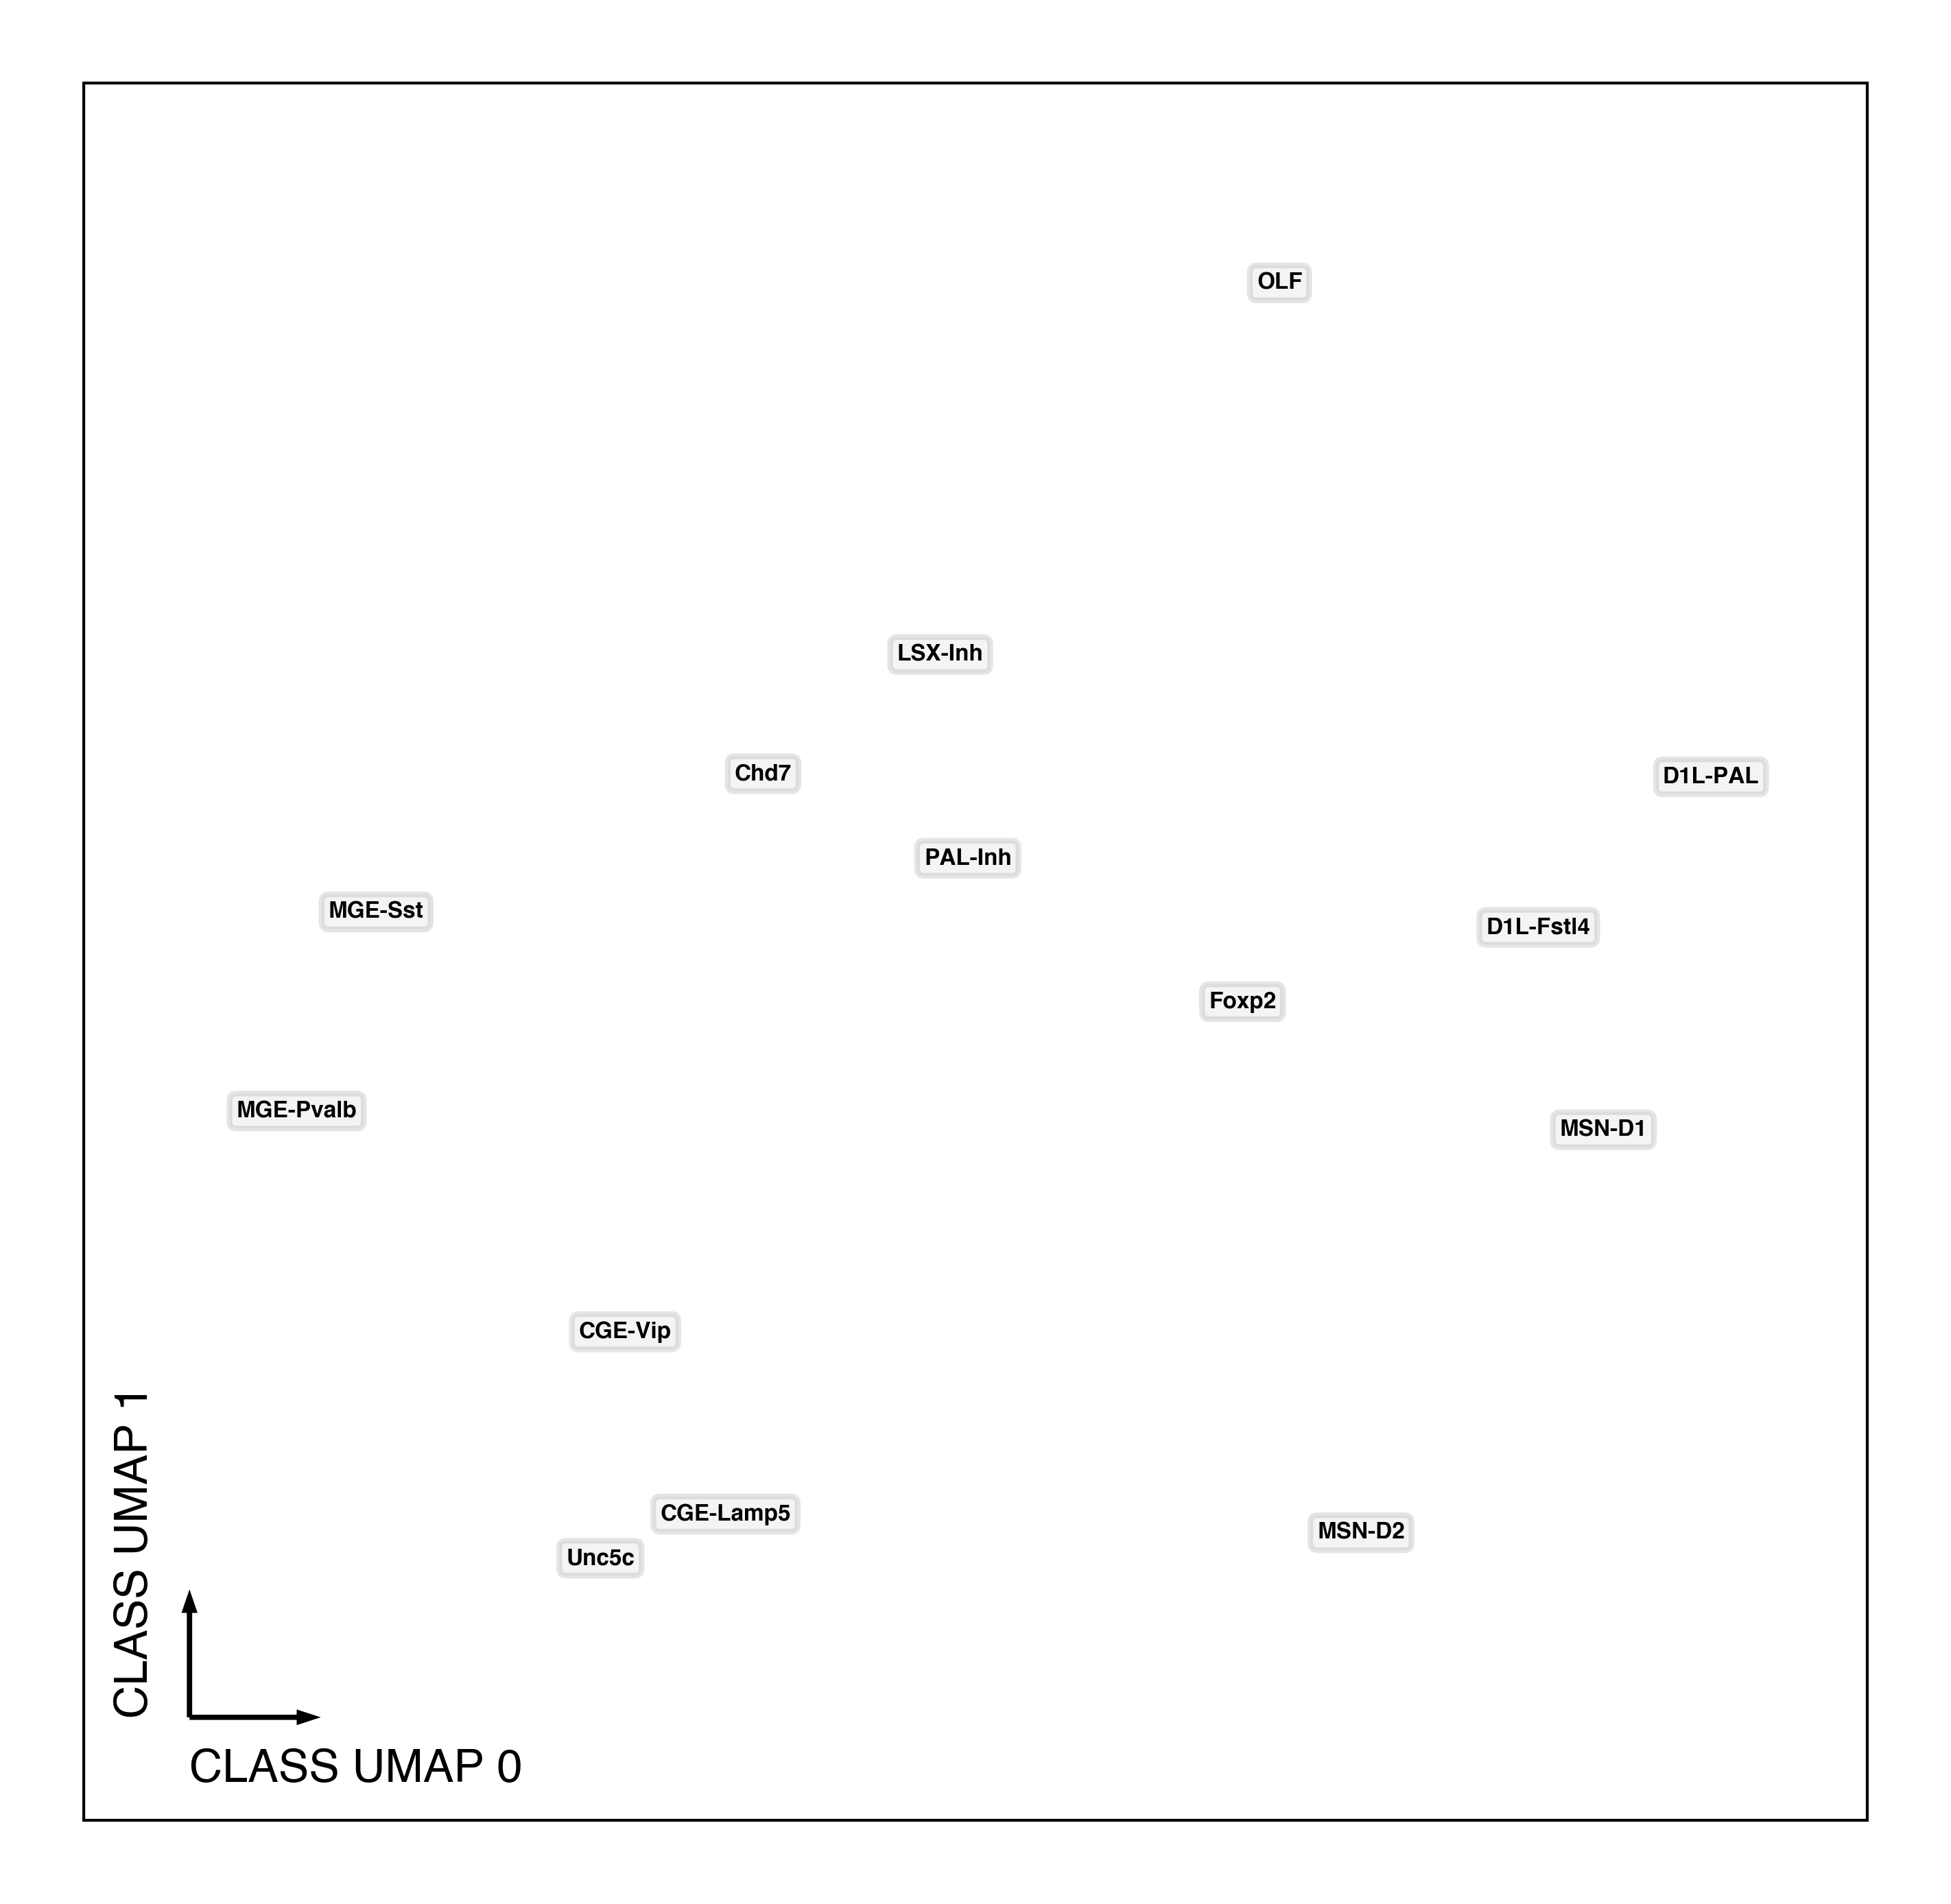

In [9]:
fig, ax = plt.subplots(figsize=(2.8, 2.8), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='class_umap',
                    hue='SubType',
                    palette=sub_type_palette,
                    s=0.3,
                    max_points=None,
                    # axis_format=None,
                    text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))


add_ax_box(ax, linewidth=0.5)
ax.collections[0].remove()
fig.savefig(f'files/{cell_class}_CLASS-UMAP_color_by_sub_type.label_part.pdf')

pass

## Color by region

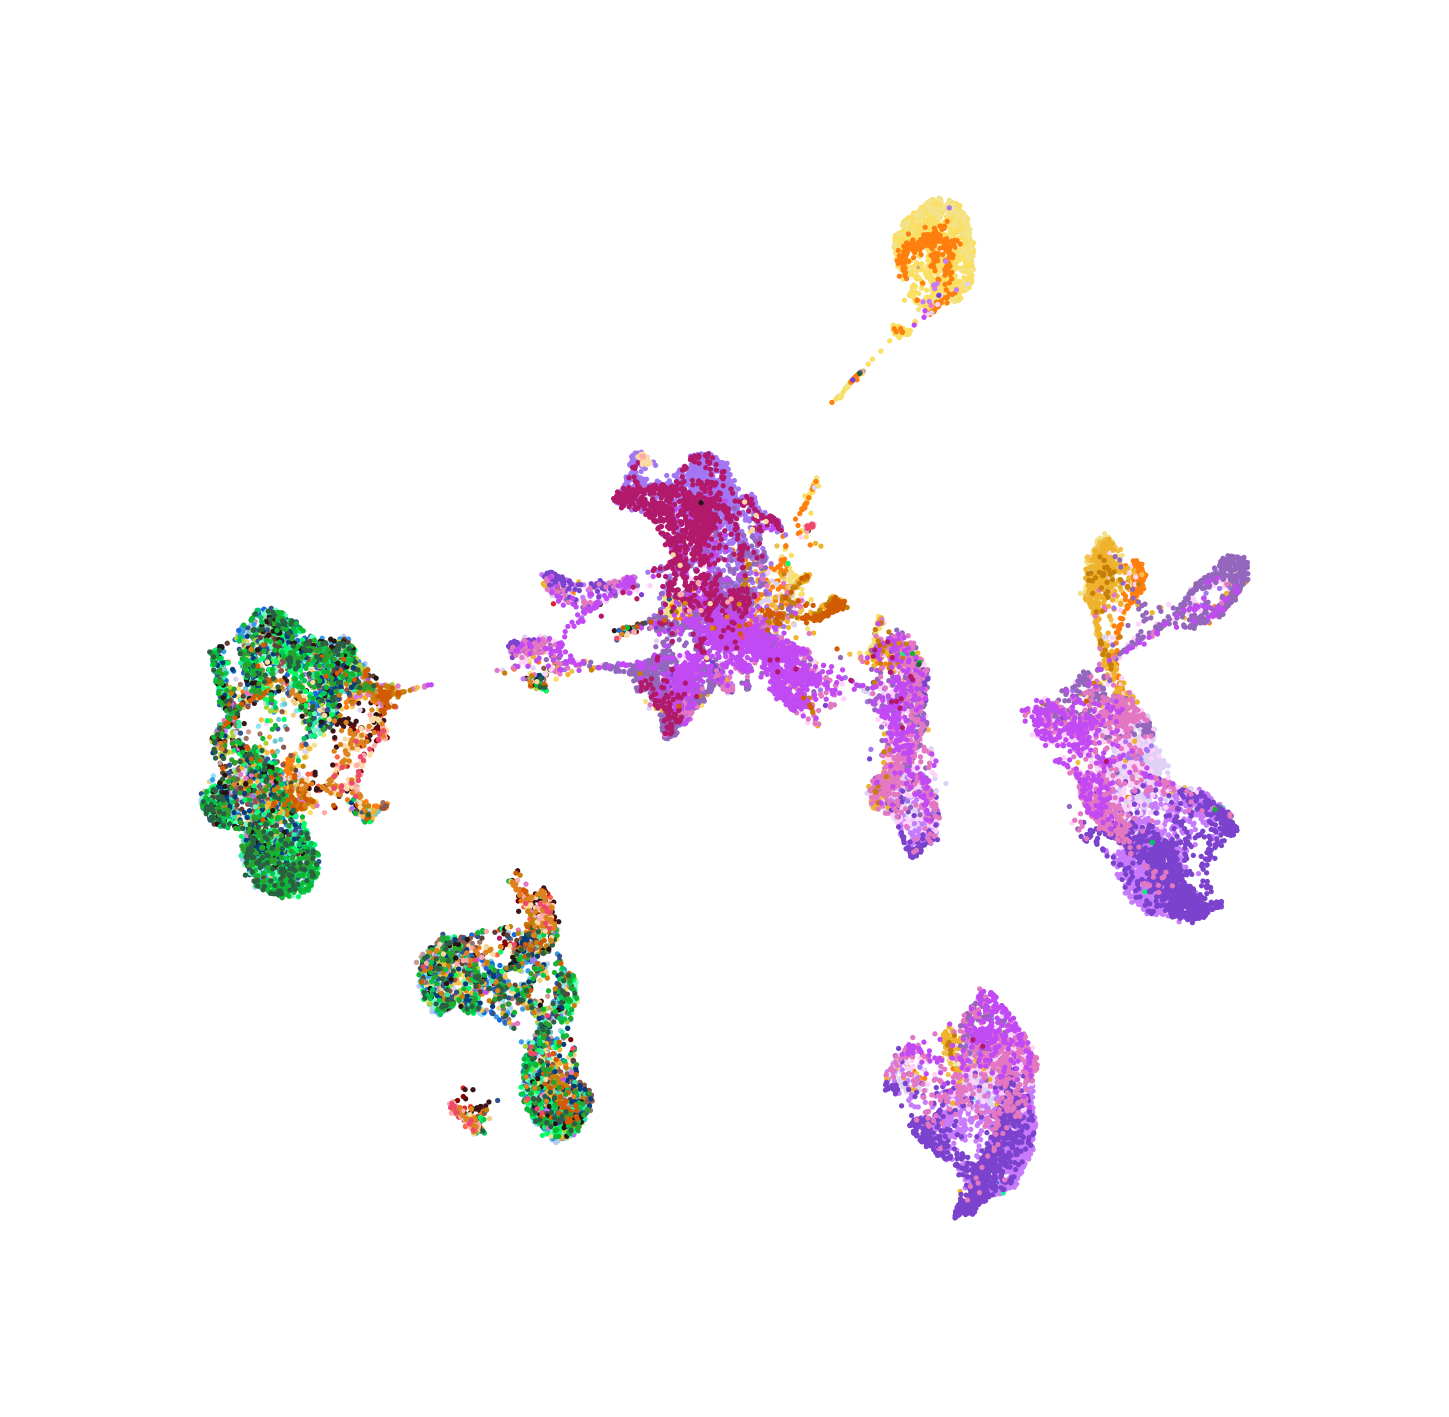

In [10]:
fig, ax = plt.subplots(figsize=(1.3, 1.3), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='class_umap',
                    hue='Region',
                    palette=region_palette,
                    s=0.1,
                    max_points=None,
                    axis_format=None,
                    #text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))

# add_ax_box(ax, linewidth=0.5)
# ax.collections[0].remove()
fig.savefig(f'files/{cell_class}_CLASS-UMAP_color_by_region.scatter_part.png')

pass

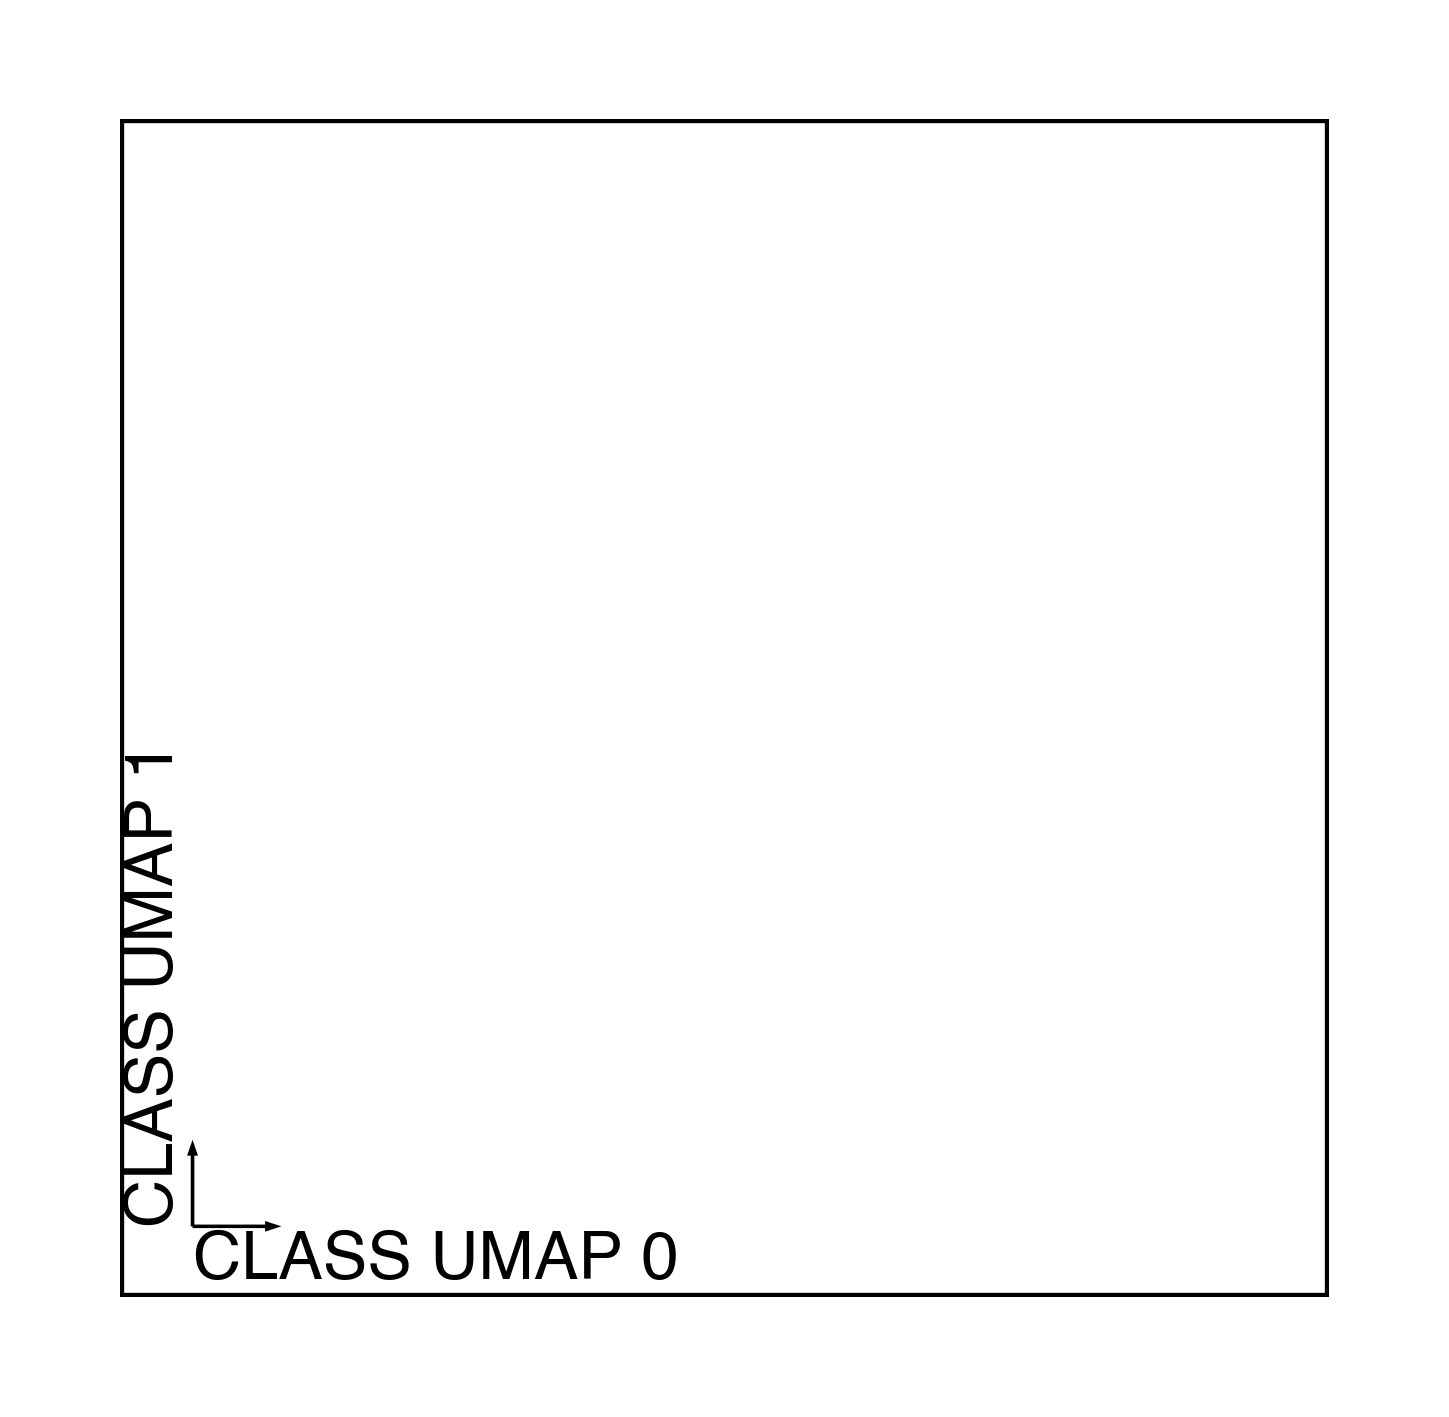

In [11]:
fig, ax = plt.subplots(figsize=(1.3, 1.3), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='class_umap',
                    hue='Region',
                    palette=region_palette,
                    s=0.3,
                    max_points=None,
                    # axis_format=None,
                    # text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))


add_ax_box(ax, linewidth=0.5)
ax.collections[0].remove()
fig.savefig(f'files/{cell_class}_CLASS-UMAP_color_by_region.label_part.pdf')

pass

## Color by global mCH

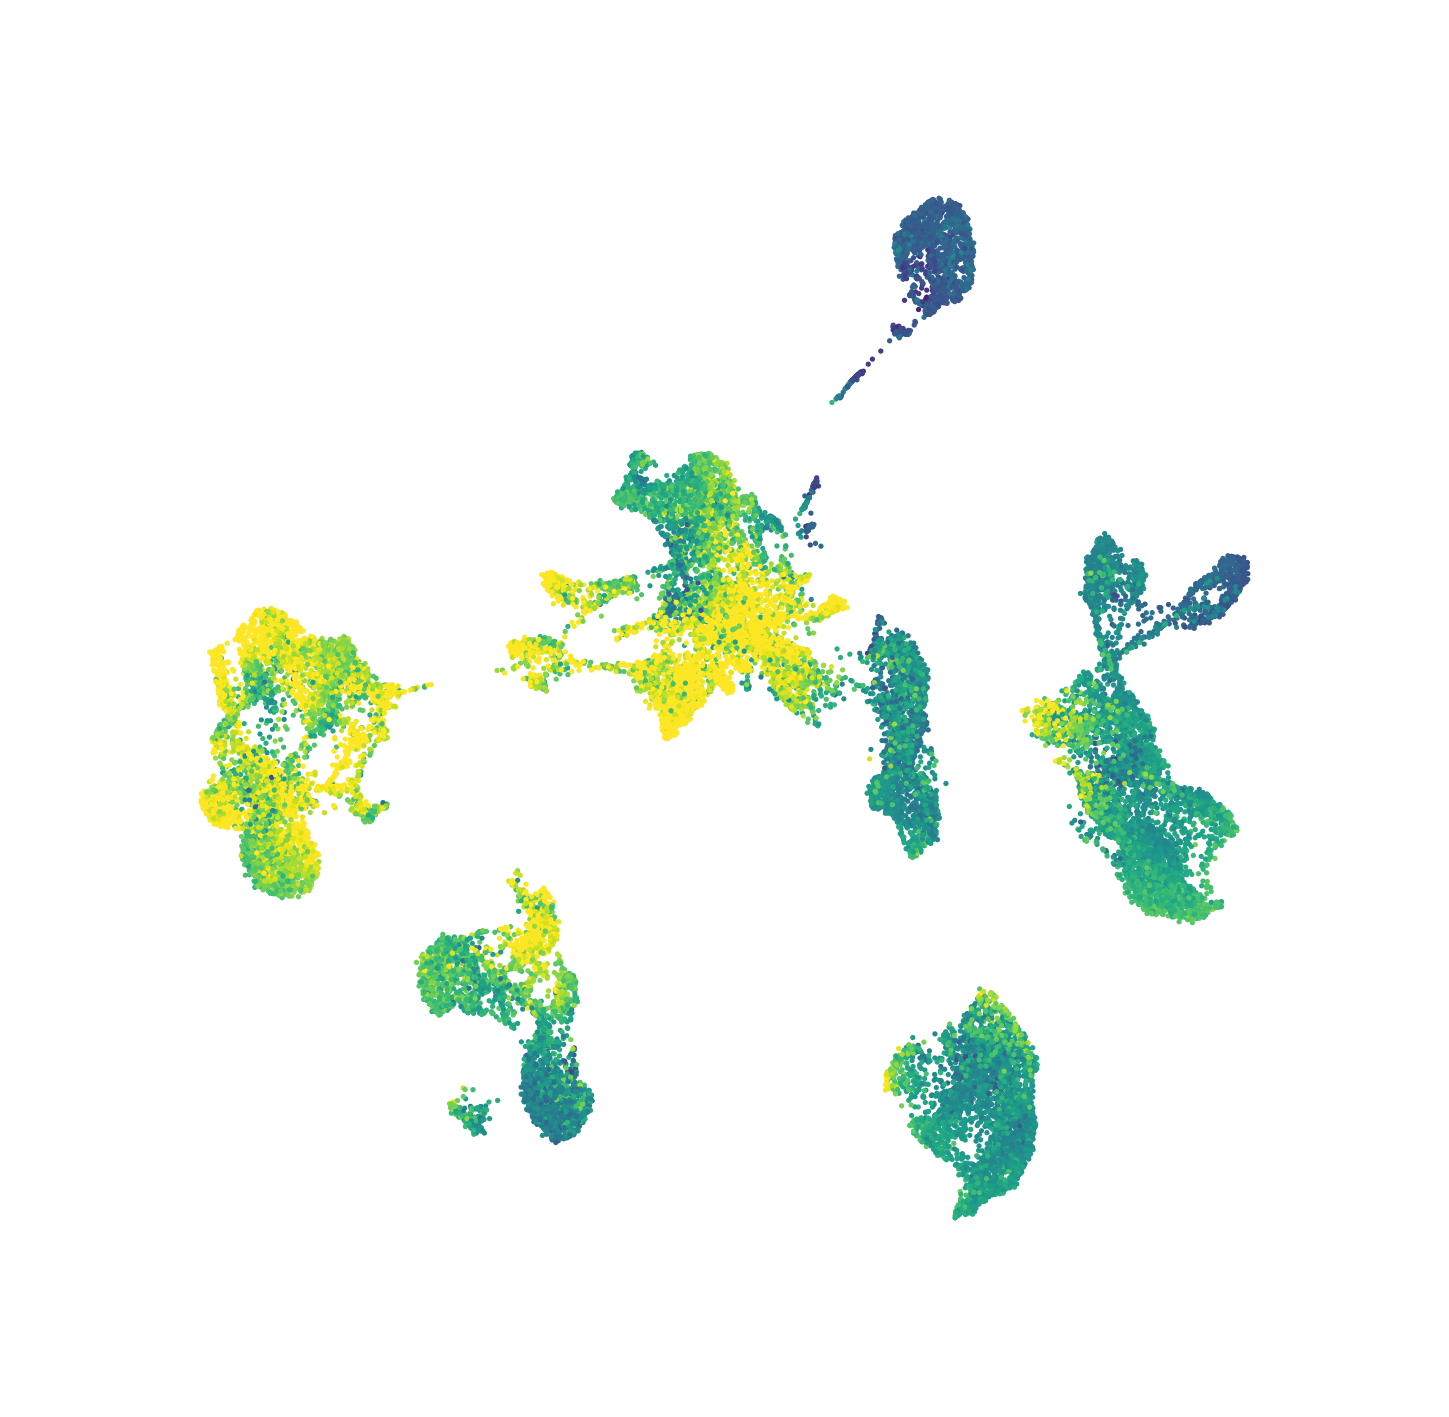

In [12]:
fig, ax = plt.subplots(figsize=(1.3, 1.3), dpi=1200)

continuous_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='class_umap',
                    hue='CH_RateAdj',
                    cmap='viridis',
                    hue_norm=(0, 0.03),
                    s=0.1,
                    max_points=None,
                    axis_format=None,
                    # text_anno='MajorType', 
                    colorbar=False,
                    text_anno_kws=dict(fontsize=2))


#add_ax_box(ax, linewidth=0.5)
#ax.collections[0].remove()
fig.savefig(f'files/{cell_class}_CLASS-UMAP_color_by_mch.scatter_part.png')

pass

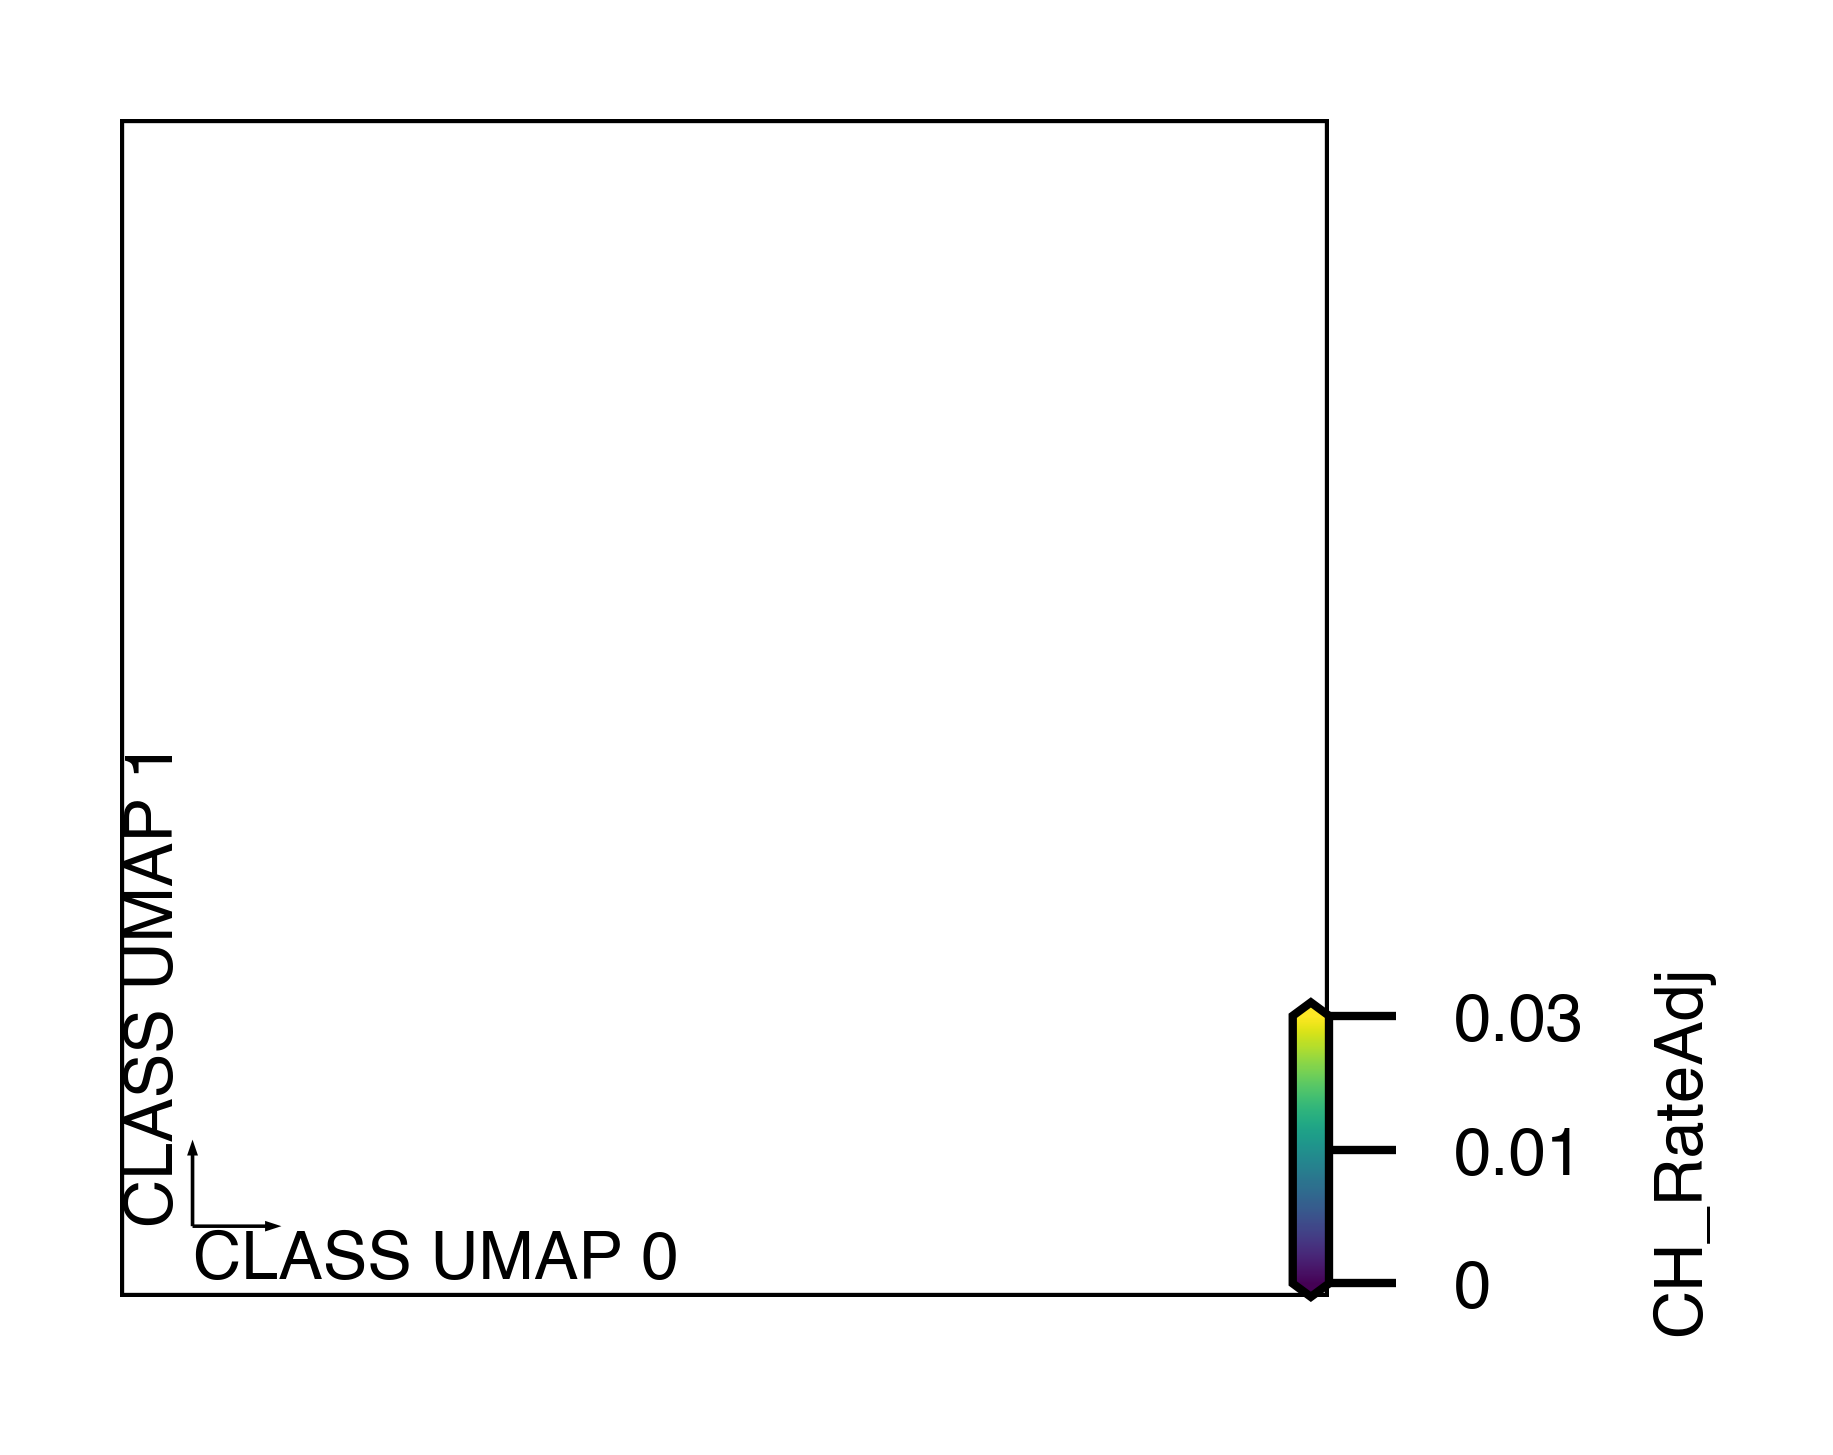

In [13]:
fig, ax = plt.subplots(figsize=(1.3, 1.3), dpi=1200)

r = continuous_scatter(
    ax=ax,
    data=cell_tidy_data,
    coord_base='class_umap',
    hue='CH_RateAdj',
    cmap='viridis',
    hue_norm=(0, 0.03),
    s=0.3,
    max_points=None,
    # axis_format=None,
    # text_anno='MajorType',
    colorbar=True,
    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
ax.collections[0].remove()
fig.savefig(f'files/{cell_class}_CLASS-UMAP_color_by_mch.label_part.pdf')

pass

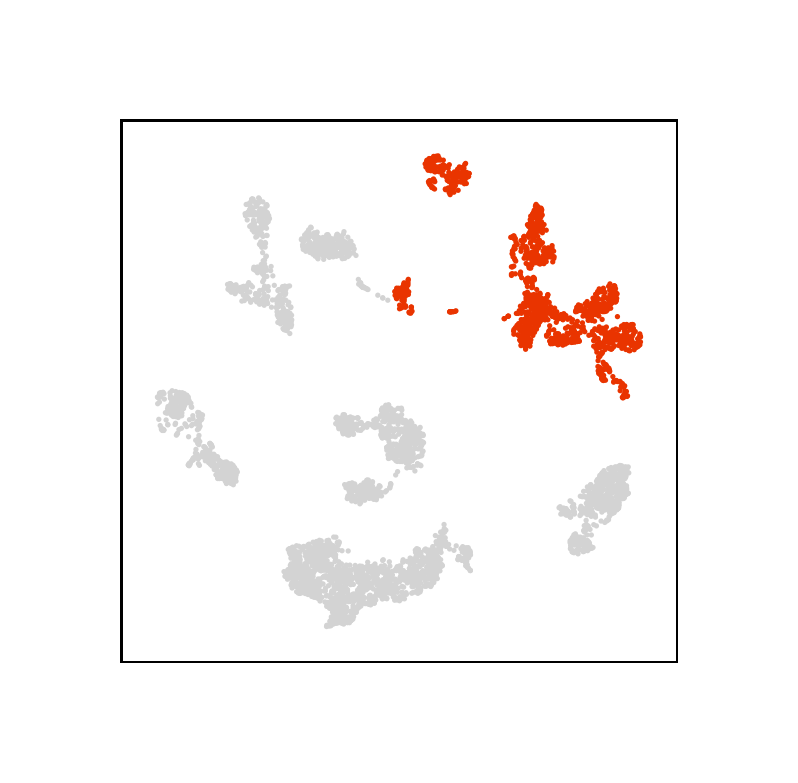

In [20]:
fig, ax = plt.subplots(figsize=(0.6, 0.6), dpi=1200)

categorical_scatter(ax=ax,
                    data=total_cell_tidy_data,
                    coord_base='l1-umap',
                    hue=total_cell_tidy_data['CellClass'] == cell_class,
                    palette={True: cell_class_palette[cell_class], 
                             False: '#D3D3D3'},
                    s=0.1,
                    # max_points=5000,
                    axis_format=None,
                    # text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))


add_ax_box(ax, linewidth=0.3)
fig.savefig(f'files/{cell_class}_small_legend.png')

pass